Loading in Data

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib as plt 
import seaborn as sns 
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['survey.csv']))
df

Saving survey.csv to survey.csv


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [ ]:
last_10_columns = df.iloc[:, -3:]
last_10_columns

,mental_vs_physical,obs_consequence,comments
0,Yes,No,NaN
1,Don't know,No,NaN
2,No,No,NaN
3,No,Yes,NaN
4,Don't know,No,NaN
...,...,...,...
1254,Don't know,No,NaN
1255,Yes,No,NaN
1256,No,No,NaN
1257,No,No,NaN


In [ ]:
#Learning a bit more about the data 
print(df['Age'].mean)
#All are object types besides age which looks good 
df.info()

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       37
1       44
2       32
3       31
4       31
        ..
1254    26
1255    32
1256    34
1257    46
1258    25
Name: Age, Length: 1259, dtype: int64>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remot

In [ ]:
#Using value counts to make sure that no data looks too funny 
#There are some weird ages, so I need to exclude those ages 
df['Age'].value_counts()

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 22             21
 41             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 5               1
-1               1
 11              1
 8               1
 61              1
 53              1
-29              1
-1726            1
 65              1
 62              1
 58              1
 329             1
 72         

In [ ]:
print(df['Age'].mean)

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       37
1       44
2       32
3       31
4       31
        ..
1254    26
1255    32
1256    34
1257    46
1258    25
Name: Age, Length: 1259, dtype: int64>


In [ ]:
incorrect_age_condition1 = df['Age'] < 17 

In [ ]:
incorrect_age_condition2 = df['Age'] > 80

In [ ]:
df = df.drop(df[incorrect_age_condition1].index)
df = df.drop(df[incorrect_age_condition2].index)

<ipython-input-9-14a41e4c0521>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(df[incorrect_age_condition2].index)


In [ ]:
df['Gender'].value_counts()
#Changing all genders to be in a consistent format 

Male                                              612
male                                              204
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Malr                                                1
Trans woman                                         1
male leaning androgynous                            1
Cis Man                     

In [ ]:
print(df['Gender'].unique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'Malr' 'femail' 'Cis Man'
 'ostensibly male, unsure what that really means']


In [ ]:
male_variations = ['M', 'm', 'man', 'Male', 'male', 'Male-ish', 'maile', 'something kinda male?', 'Cis Male', 'Mal', 'Male (CIS)', 'Make', 'Guy (-ish) ^_^', 'male leaning androgynous', 'Male ', 'Man', 'msle', 'Mail', 'cis male', 'Malr', 'Cis Man', 'ostensibly male, unsure what that really means']

In [ ]:
df['Gender'] = df['Gender'].replace(male_variations, 'Male')

In [ ]:
female_variations = ['Female', 'female', 'Cis Female', 'F', 'Woman', 'f', 'Femake' , 'woman', 'Female ', 'cis-female/femme', 'Female (cis)', 'femail']

In [ ]:
df['Gender'] = df['Gender'].replace(female_variations, 'Female')

In [ ]:
other_variations = ['Trans-female','queer/she/they', 'non-binary','Nah', 'All', 'Enby' ,'fluid','Genderqueer', 'Androgyne', 'Agender', 'Trans woman', 'Neuter', 'Female (trans)' ,'queer', 'A little about you', 'p']

In [ ]:
df['Gender'] = df['Gender'].replace(other_variations, 'Other')

In [ ]:
#Successfully made consistent gender categories
print(df['Gender'].unique())

['Female' 'Male' 'Other']


In [ ]:
#Successfully dropped incorrect ages 
print(df['Age'].unique())

[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72]


In [ ]:
#Double checking these successes—looks good
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,Male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,Female,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [ ]:
df['Country'].value_counts()

United States             746
United Kingdom            184
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Italy                       7
Poland                      7
Sweden                      7
Switzerland                 7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Mexico                      3
Russia                      3
Finland                     3
Austria                     3
Denmark                     2
Greece                      2
Portugal                    2
Colombia                    2
Croatia                     2
Moldova                     1
Georgia                     1
China                       1
Thailand                    1
Czech Repu

In [ ]:
df['state'].value_counts()

CA    138
WA     70
NY     57
TN     45
TX     44
OR     29
PA     29
IL     28
IN     27
OH     27
MI     22
MN     20
MA     20
FL     15
NC     14
VA     14
WI     12
GA     12
MO     12
UT     11
CO      9
MD      8
AL      7
AZ      7
OK      6
NJ      6
KY      5
SC      5
IA      4
CT      4
DC      4
NV      3
VT      3
SD      3
KS      3
NH      3
WY      2
NM      2
NE      2
WV      1
ID      1
MS      1
RI      1
LA      1
ME      1
Name: state, dtype: int64

In [ ]:
df['self_employed'].value_counts()

No     1091
Yes     142
Name: self_employed, dtype: int64

In [ ]:
df['family_history'].value_counts()

No     762
Yes    489
Name: family_history, dtype: int64

In [ ]:
df['treatment'].value_counts()

Yes    632
No     619
Name: treatment, dtype: int64

In [ ]:
df['work_interfere'].value_counts()

Sometimes    464
Never        212
Rarely       173
Often        140
Name: work_interfere, dtype: int64

In [ ]:
#How many employees does your company or organization have?
df['no_employees'].value_counts()

6-25              289
26-100            288
More than 1000    281
100-500           175
1-5               158
500-1000           60
Name: no_employees, dtype: int64

In [ ]:
df['remote_work'].value_counts()

No     880
Yes    371
Name: remote_work, dtype: int64

In [ ]:
df['benefits'].value_counts()

Yes           473
Don't know    407
No            371
Name: benefits, dtype: int64

In [ ]:
df['care_options'].value_counts()

No          499
Yes         439
Not sure    313
Name: care_options, dtype: int64

In [ ]:
df['wellness_program'].value_counts()

No            837
Yes           227
Don't know    187
Name: wellness_program, dtype: int64

In [ ]:
df['seek_help'].value_counts()

No            641
Don't know    363
Yes           247
Name: seek_help, dtype: int64

In [ ]:
df['anonymity'].value_counts()

Don't know    815
Yes           372
No             64
Name: anonymity, dtype: int64

In [ ]:
df['leave'].value_counts()

Don't know            561
Somewhat easy         265
Very easy             203
Somewhat difficult    125
Very difficult         97
Name: leave, dtype: int64

In [ ]:
df['mental_health_consequence'].value_counts()

No       487
Maybe    476
Yes      288
Name: mental_health_consequence, dtype: int64

In [ ]:
df['phys_health_consequence'].value_counts()

No       920
Maybe    273
Yes       58
Name: phys_health_consequence, dtype: int64

In [ ]:
df['mental_vs_physical'].value_counts()

Don't know    574
Yes           339
No            338
Name: mental_vs_physical, dtype: int64

In [ ]:
df['tech_company'].value_counts()

Yes    1025
No      226
Name: tech_company, dtype: int64

In [ ]:
df['obs_consequence'].value_counts()

No     1070
Yes     181
Name: obs_consequence, dtype: int64

In [ ]:
condition = df['self_employed'] == "Yes"

In [ ]:
#Remove those who are self_employed because they are not relevant to the question we are trying to answer 
df = df[~condition]

In [ ]:
print(df['self_employed'].unique())

[nan 'No']


In [ ]:
#I am going to also get rid of the rows that didn't put a respnse for self-employed to avoid messing up the data more  
print(df.isna().mean() * 100)

Timestamp                     0.000000
Age                           0.000000
Gender                        0.000000
Country                       0.000000
state                        38.142471
self_employed                 1.623084
family_history                0.000000
treatment                     0.000000
work_interfere               21.731289
no_employees                  0.000000
remote_work                   0.000000
tech_company                  0.000000
benefits                      0.000000
care_options                  0.000000
wellness_program              0.000000
seek_help                     0.000000
anonymity                     0.000000
leave                         0.000000
mental_health_consequence     0.000000
phys_health_consequence       0.000000
coworkers                     0.000000
supervisor                    0.000000
mental_health_interview       0.000000
phys_health_interview         0.000000
mental_vs_physical            0.000000
obs_consequence          

In [ ]:
df = df.dropna(subset=['self_employed'])
#You can see above that this change worked 

In [ ]:
remote = df['remote_work']
obs = df['obs_consequence']

In [ ]:
#Filling in NaNs of those who didn't fill in work interference 
df['work_interfere'] = df['work_interfere'].fillna('Not sure')

<ipython-input-46-bcf725df6393>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['work_interfere'] = df['work_interfere'].fillna('Not sure')


In [ ]:
#Discard country, state, timestamp, and comment variables 
df = df.drop("Timestamp", axis = 1)

In [ ]:
df = df.drop("Country", axis = 1)

In [ ]:
df = df.drop("state", axis = 1)

In [ ]:
df = df.drop("comments", axis = 1)

In [ ]:
#Drop self emplpyed because I'm trying to give feedback to people who work at these companies
df = df.drop("self_employed", axis = 1)

In [ ]:
df = df[df["tech_company"] != "No"]

In [ ]:
df['tech_company'].value_counts()

Yes    881
Name: tech_company, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 20 to 1257
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        881 non-null    int64 
 1   Gender                     881 non-null    object
 2   family_history             881 non-null    object
 3   treatment                  881 non-null    object
 4   work_interfere             881 non-null    object
 5   no_employees               881 non-null    object
 6   remote_work                881 non-null    object
 7   tech_company               881 non-null    object
 8   benefits                   881 non-null    object
 9   care_options               881 non-null    object
 10  wellness_program           881 non-null    object
 11  seek_help                  881 non-null    object
 12  anonymity                  881 non-null    object
 13  leave                      881 non-null    object
 14  mental_h

In [ ]:
cross_tab = pd.crosstab(remote, obs)
cross_tab

obs_consequence,No,Yes
remote_work,,
No,701,124
Yes,241,25


Text(0.5, 1.0, 'Relationship Between Remote Work and Negative Consequences for Mental Health')

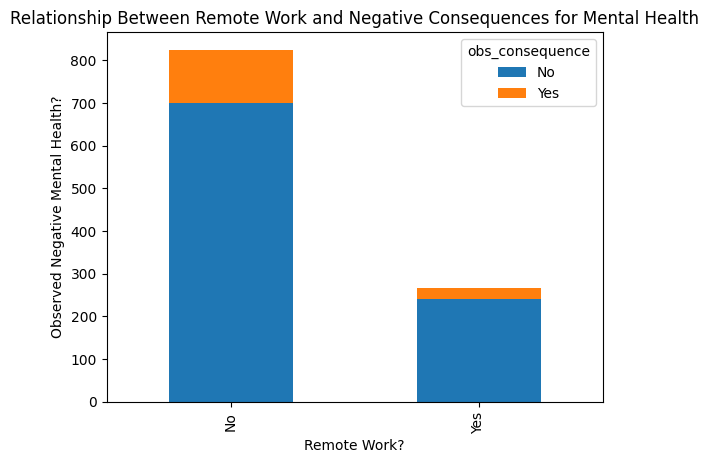

In [ ]:
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Remote Work?')
plt.ylabel('Observed Negative Mental Health?')
plt.title('Relationship Between Remote Work and Negative Consequences for Mental Health')
#Approximately 15% of people who work in person see mental health issued getting a negative response 
#Approximately 9.4% of people who work mostly remote see mental issues getting a negative response 
#Don't see a huge red flag here just based on this variable

Text(0.5, 1.0, 'Gender Distribution')

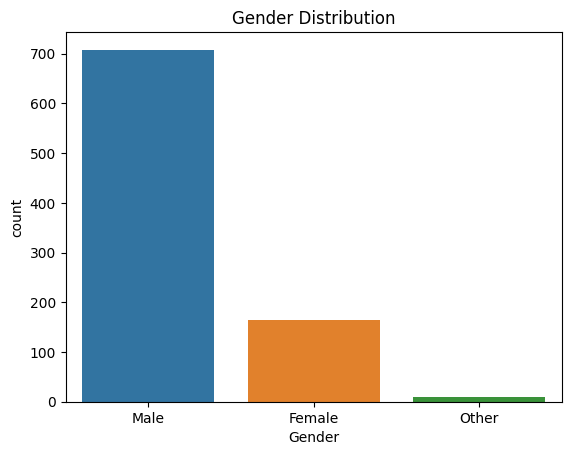

In [ ]:
sns.countplot(x = 'Gender', data = df)
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Family History')

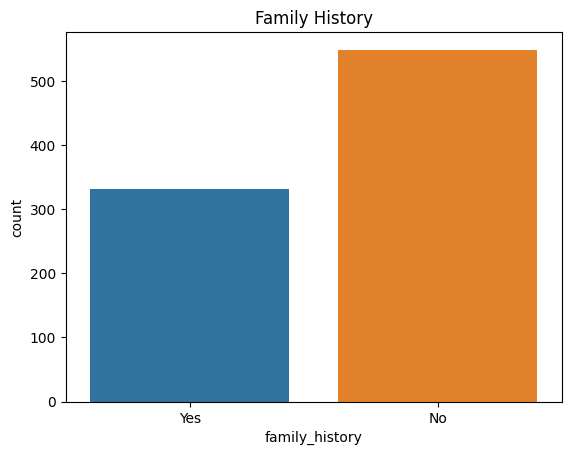

In [ ]:
sns.countplot(x = 'family_history', data = df)
plt.title('Family History')

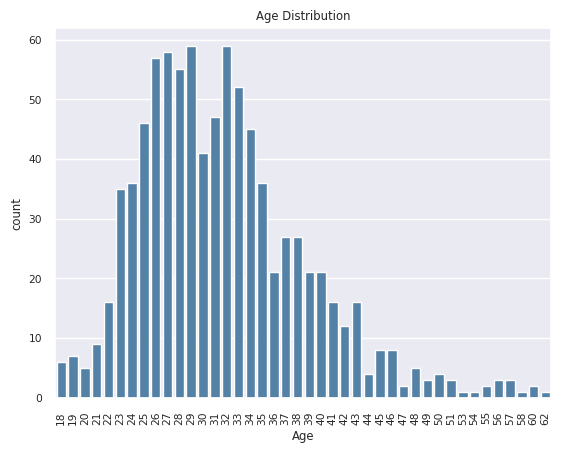

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the font size for the graph
sns.set(font_scale=0.7)

bar_color = 'steelblue'

# Create the countplot
ax = sns.countplot(x='Age', data=df, color = bar_color)

# Set the title for the graph
plt.title('Age Distribution')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()


<Axes: xlabel='family_history', ylabel='count'>

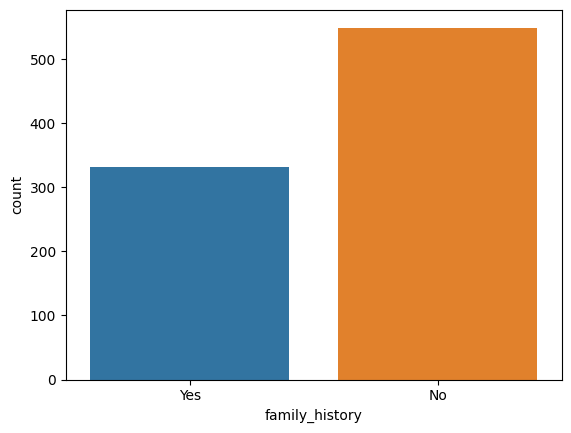

In [ ]:
sns.countplot(x = 'family_history', data = df)

<Axes: xlabel='mental_vs_physical', ylabel='count'>

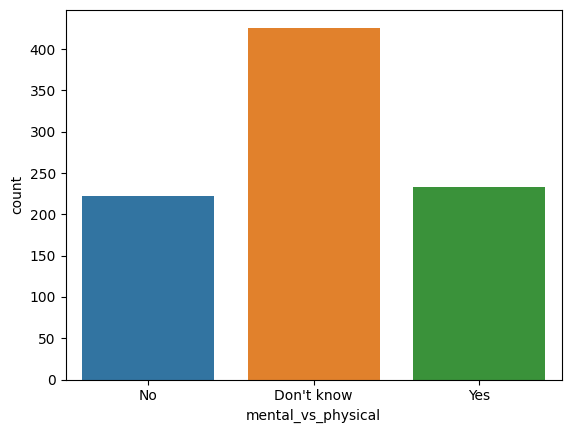

In [ ]:
sns.countplot(x = 'mental_vs_physical', data = df)

<Axes: xlabel='leave', ylabel='count'>

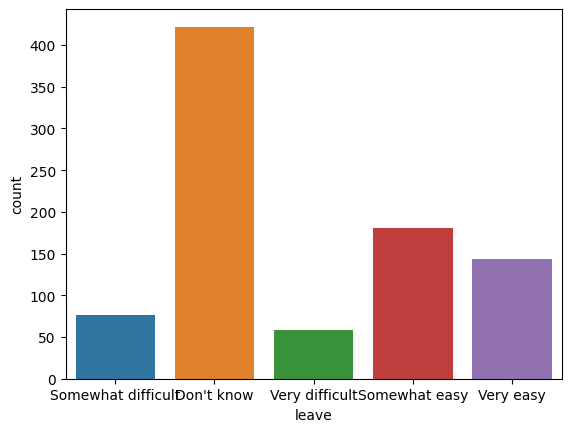

In [ ]:
sns.countplot(x = 'leave', data = df)

<Axes: xlabel='care_options', ylabel='count'>

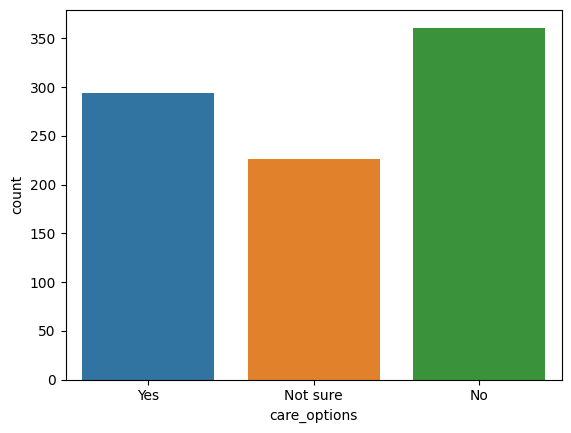

In [ ]:
sns.countplot(x = 'care_options', data = df)

<Axes: xlabel='wellness_program', ylabel='count'>

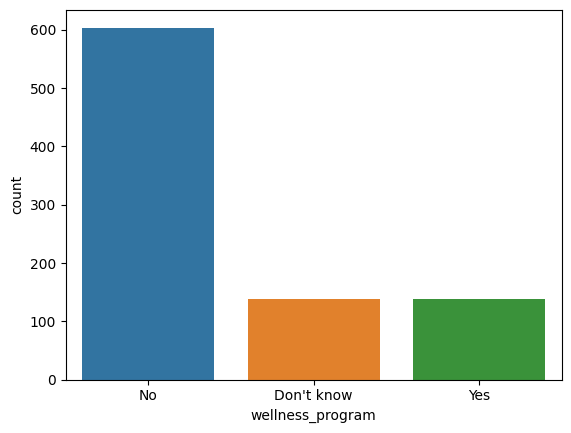

In [ ]:
sns.countplot(x = 'wellness_program', data = df)

<Axes: xlabel='obs_consequence', ylabel='count'>

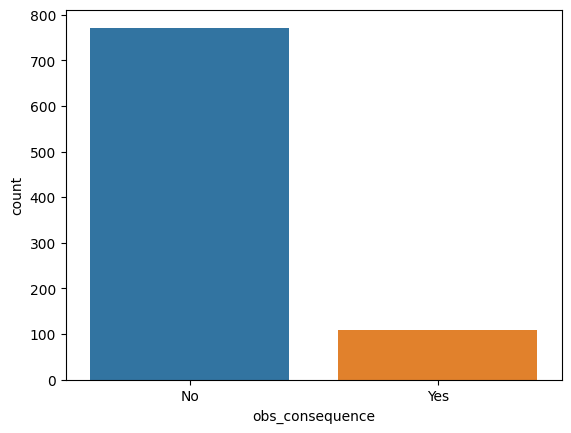

In [ ]:
sns.countplot(x = 'obs_consequence', data = df)

<Axes: xlabel='mental_health_consequence', ylabel='count'>

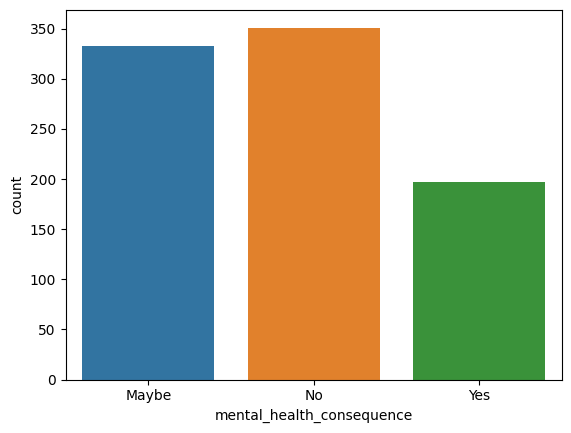

In [ ]:
sns.countplot(x = 'mental_health_consequence', data = df)

<Axes: xlabel='phys_health_consequence', ylabel='count'>

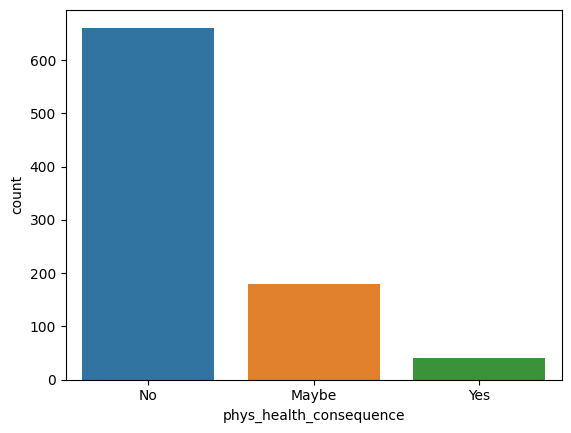

In [ ]:
sns.countplot(x = 'phys_health_consequence', data = df)

<Axes: xlabel='no_employees', ylabel='count'>

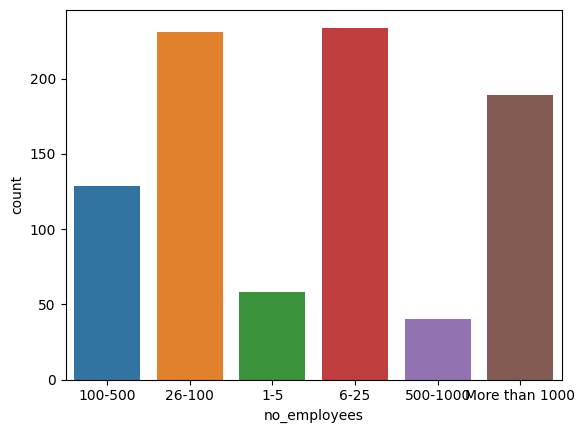

In [ ]:
sns.countplot(x = 'no_employees', data = df)

<Axes: xlabel='care_options', ylabel='count'>

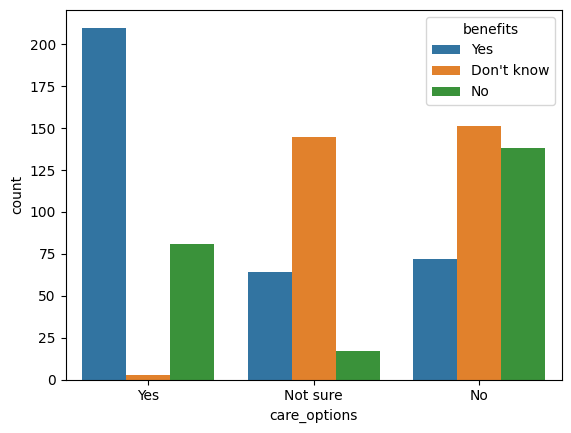

In [ ]:
sns.countplot(data = df, x = "care_options", hue = "benefits")
#Those who know the options for mental health benefits know that their employer provides mental health benefits

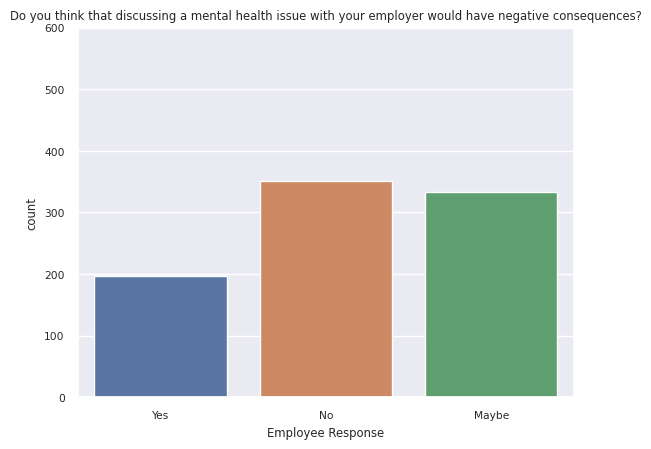

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the desired order of the categories
category_order = ["Yes", "No", "Maybe"]

# Create the countplot with the specified order
sns.countplot(data=df, x="mental_health_consequence", order=category_order)

# Set the y-axis limit
plt.ylim(0, 600)

# Add x-axis label
plt.xlabel("Employee Response")

# Set the title
plt.title('Do you think that discussing a mental health issue with your employer would have negative consequences?')

# Display the plot
plt.show()


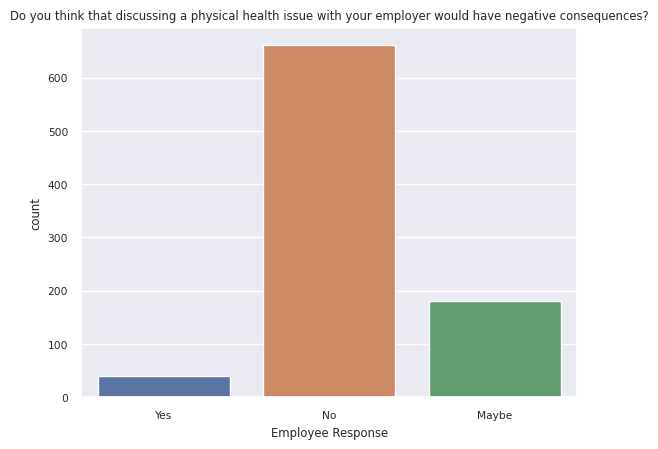

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the desired order of the categories
category_order = ["Yes", "No", "Maybe"]

# Create the countplot with the specified order
sns.countplot(data=df, x="phys_health_consequence", order=category_order)

# Add x-axis label
plt.xlabel("Employee Response")

# Set the title
plt.title('Do you think that discussing a physical health issue with your employer would have negative consequences?')

# Display the plot
plt.show()



<Axes: xlabel='mental_vs_physical', ylabel='count'>

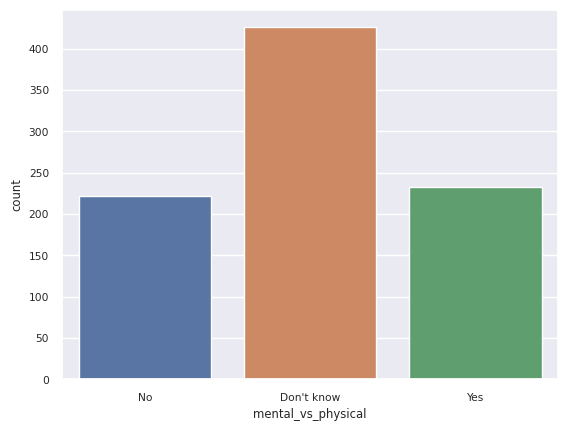

In [ ]:
sns.countplot(data = df, x = "mental_vs_physical")

<Axes: xlabel='care_options', ylabel='count'>

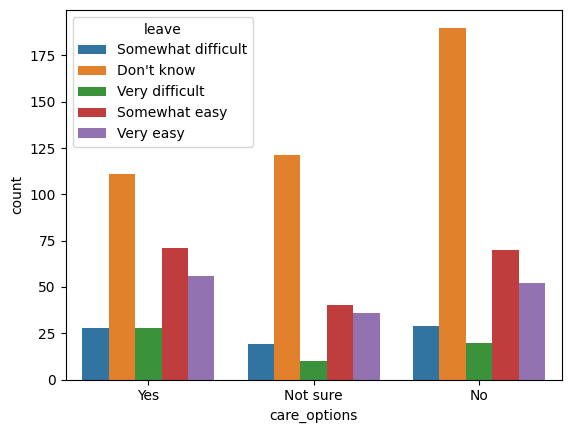

In [ ]:
sns.countplot(data = df, x = "care_options", hue = "leave")
#The more people knew about their mental health resources, the easier they thought it was to take medical leave for a medical condition 
#However, many of them still didn't know how easy it would be to leave for mental health

<Axes: xlabel='benefits', ylabel='count'>

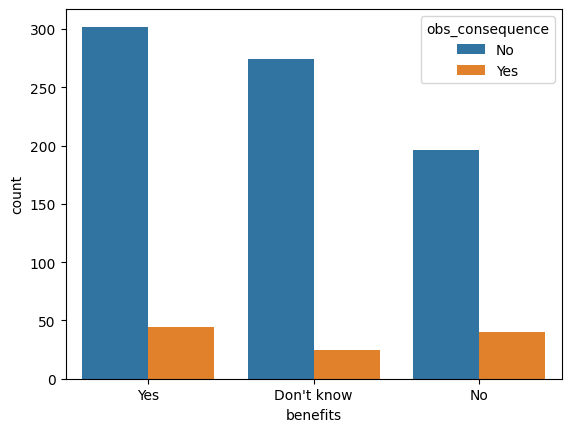

In [ ]:
sns.countplot(data = df, x = "benefits", hue = "obs_consequence")
#More mental health benefits show less observed negative consequences for those with mental health issues 

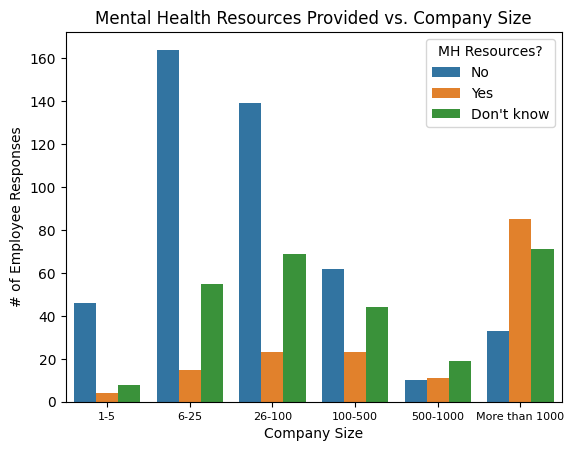

In [ ]:
desired_order = ["1-5", "6-25", "26-100", "100-500", "500-1000", "More than 1000"]
sns.countplot(data = df, x = "no_employees", hue = "seek_help", order=desired_order)
plt.xlabel("Company Size")
plt.ylabel("# of Employee Responses")
plt.title("Mental Health Resources Provided vs. Company Size")
plt.xticks(fontsize=8) 
plt.legend(title="MH Resources?")
#Seems like with the biggest companies, they are more aware of the healthcare benefits available to them 

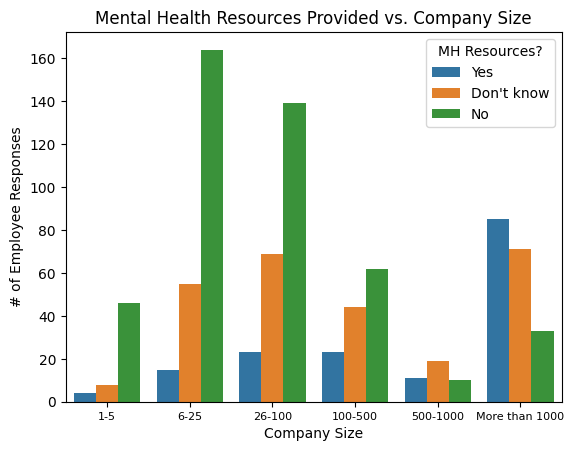

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

desired_order = ["1-5", "6-25", "26-100", "100-500", "500-1000", "More than 1000"]
desired_order2 = ["Yes", "Don't know", "No"]

sns.countplot(data=df, x="no_employees", hue="seek_help", order=desired_order, hue_order=desired_order2)
plt.xlabel("Company Size")
plt.ylabel("# of Employee Responses")
plt.title("Mental Health Resources Provided vs. Company Size")
plt.xticks(fontsize=8)

plt.legend(title="MH Resources?")

plt.show()



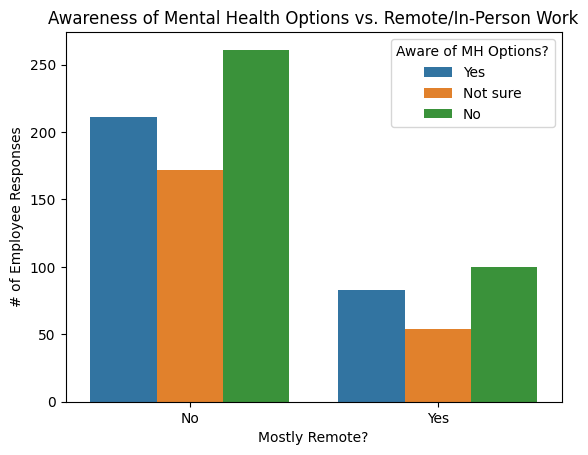

In [ ]:
sns.countplot(data = df, x = "remote_work", hue = "care_options")
plt.xlabel("Mostly Remote?")
plt.ylabel("# of Employee Responses")
plt.title("Awareness of Mental Health Options vs. Remote/In-Person Work")
plt.legend(title= "Aware of MH Options?")

In [ ]:
df.to_csv(r'C:\Users\rileywilson\Downloads\survey_edited.csv')
print(df)

      Age  Gender family_history treatment work_interfere    no_employees  \
20     29    Male            Yes       Yes      Sometimes         100-500   
22     46    Male             No       Yes          Often          26-100   
24     33    Male            Yes       Yes         Rarely          26-100   
26     33    Male             No        No       Not sure             1-5   
27     35  Female            Yes       Yes         Rarely            6-25   
...   ...     ...            ...       ...            ...             ...   
1252   29    Male            Yes       Yes      Sometimes         100-500   
1254   26    Male             No       Yes       Not sure          26-100   
1255   32    Male            Yes       Yes          Often          26-100   
1256   34    Male            Yes       Yes      Sometimes  More than 1000   
1257   46  Female             No        No       Not sure         100-500   

     remote_work tech_company    benefits care_options  ...   anonymity  \


In [ ]:
df.to_csv('survey_edited.csv')

NameError: ignored

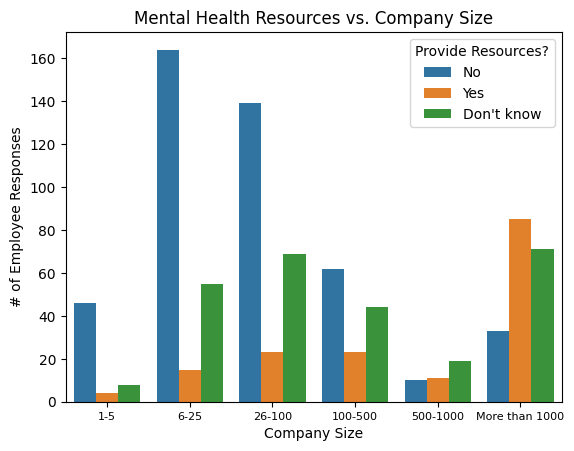

In [ ]:
desired_order = ["1-5", "6-25", "26-100", "100-500", "500-1000", "More than 1000"]
sns.countplot(data = df, x = "no_employees", hue = "seek_help", order=desired_order)
plt.xlabel("Company Size")
plt.ylabel("# of Employee Responses")
plt.title("Mental Health Resources vs. Company Size")
plt.xticks(fontsize=8) 
plt.legend(title="Provide Resources?")

# Create the new legend with the rearranged handles and labels
plt.legend(handles, labels, title="Provide Resources?")



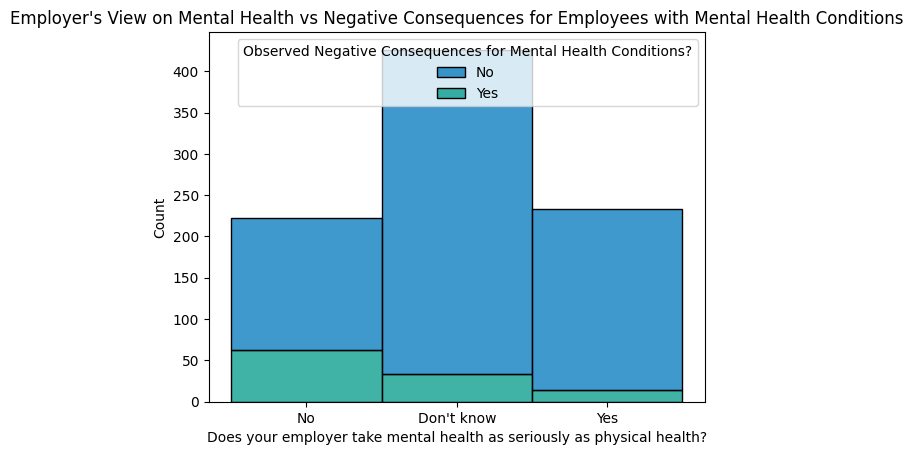

In [ ]:
color7 = ['#0077BB', '#009988']

consequence_cat = list(df.obs_consequence.value_counts().index)
color_cat = {}
for i in range(len(consequence_cat)):
    color_cat[consequence_cat[i]] = color7[i]
df['color'] = df['obs_consequence'].map(color_cat)

ax = sns.histplot(binwidth=0.5, x="mental_vs_physical", hue="obs_consequence", data=df, stat="count", multiple="stack", palette=color_cat.values())

# Set the x-label
plt.xlabel("Does your employer take mental health as seriously as physical health?")
plt.title("Employer's View on Mental Health vs Negative Consequences for Employees with Mental Health Conditions")
plt.gca().get_legend().set_title("Observed Negative Consequences for Mental Health Conditions?")


In [ ]:
sns.countplot(x = 'work_interfere', data = df)

In [ ]:
sns.countplot(x = 'treatment', data = df)

In [ ]:
ax = sns.histplot(binwidth=0.5, x="work_interfere", hue="treatment", data=df, stat="count", multiple="stack", palette=color_cat.values())
#This indicates that a lot of people who have mental health issues that affect them get mental health treatment 

# Set the x-label
#plt.xlabel("Does your employer take mental health as seriously as physical health?")
#plt.title("Employer's View on Mental Health vs Negative Consequences for Employees with Mental Health Conditions")
#plt.gca().get_legend().set_title("Observed Negative Consequences for Mental Health Conditions?")

In [ ]:
#New variable for those who experience mental health that interferes with their work but haven't gotten treatment 

df['interfere_and_no_treatment'] = (df['work_interfere'].isin(['Sometimes', 'Often'])) & (df['treatment'] == 'No')
df['interfere_and_no_treatment'].value_counts()


False    790
True      91
Name: interfere_and_no_treatment, dtype: int64

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



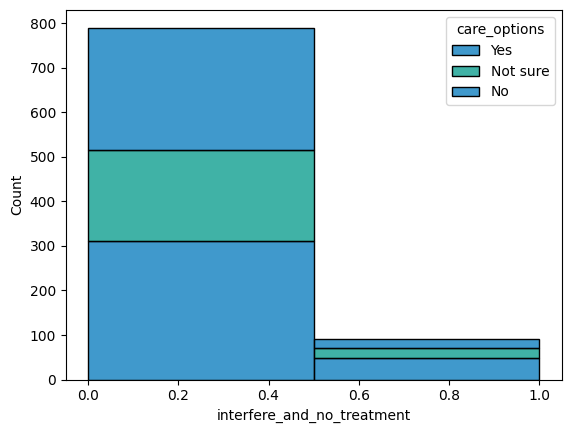

In [ ]:
#For those who don't get treatment but need it, why is that? 
#Not because they aren't aware of the options for mental health issues their employer provides 
ax = sns.histplot(binwidth=0.5, x= "interfere_and_no_treatment", hue='care_options', data=df, stat="count", multiple="stack", palette=color_cat.values())

In [ ]:
#Percentage of people with mental health issues who receive no treatment that don't know or are not sure about the options for mental health the company provides
total_counts = (df['interfere_and_no_treatment'] == True).sum()
numerator = ((df['interfere_and_no_treatment'] == True) & (df['care_options'].isin(['No', 'Not sure']))).sum()
quotient = numerator/total_counts
quotient

In [ ]:
#Does the size of the company affect how many people are aware of the resources available?

In [ ]:
#New variable for people with mental health issues who receive no treatment and are aware of their options for mental health
df['no_treatment_know_benefits'] = (df['work_interfere'].isin(['Sometimes', 'Often'])) & (df['treatment'] == 'No') & (df['care_options'] == "Yes")
df['no_treatment_know_benefits'].value_counts()

In [ ]:
total_counts = (df['no_treatment_know_benefits'] == True).sum()
numerator = ((df['no_treatment_know_benefits'] == True) & ((df['seek_help'].isin(["Yes"]) | df['benefits'].isin(["Yes"])))).sum()
quotient = numerator/total_counts
quotient

In [ ]:
#Percentage of people with mental health issues who receive no treatment and are aware of their options for mental health who don't have benefits/wellness programs/resources to seek help
total_counts = (df['no_treatment_know_benefits'] == True).sum()
numerator = ((df['no_treatment_know_benefits'] == True) & (df['seek_help'].isin(["No"]))).sum()
numerator2 = ((df['no_treatment_know_benefits'] == True) & (df['benefits'].isin(["No"]))).sum()
numerator3 = ((df['no_treatment_know_benefits'] == True) & (df['wellness_program'].isin(["No"]))).sum()
quotient = numerator3/total_counts 
quotient

KeyError: ignored

In [ ]:
#New variable for people with mental health issues who receive no treatment and are aware of their options for mental health and their company has options to seek mental health help, benefits, or wellness program 
df['no_treatment_all_resources'] = (df['work_interfere'].isin(['Sometimes', 'Often'])) & (df['treatment'] == 'No') & (df['care_options'] == "Yes") & ((df['seek_help'] == "Yes") | (df['benefits'] == "Yes"))
df['no_treatment_all_resources'].value_counts()

In [ ]:
df['no_treatment_all_resources_no_anonymity'] = (df['work_interfere'].isin(['Sometimes', 'Often'])) & (df['treatment'] == 'No') & (df['care_options'] == "Yes") & ((df['seek_help'] == "Yes") | (df['benefits'] == "Yes")) &    ((df['anonymity'] == "No") | (df['anonymity'] == "Don't know"))
df['no_treatment_all_resources_no_anonymity'].value_counts()

In [ ]:
total_counts = (df['no_treatment_all_resources_no_anonymity'] == True).sum()
numerator = ((df['no_treatment_all_resources_no_anonymity'] == True) & (df['mental_health_consequence'].isin(["Yes", "Maybe"]))).sum()
quotient = numerator/total_counts
quotient

In [ ]:
#Percentage of people who don't seek help despite having resources whose companies don't have anonymity
total_counts = (df['no_treatment_all_resources'] == True).sum()
numerator = ((df['no_treatment_all_resources'] == True) & (df['anonymity'].isin(["No", "Don't know"]))).sum()
numerator


In [ ]:
#Percentage of people who don't seek help despite having resources whose companies have stigma to mental health 
#So small we're not going to look into it 
total_counts = (df['no_treatment_all_resources'] == True).sum()
print(total_counts)
numerator = ((df['no_treatment_all_resources'] == True) & (df['mental_health_consequence'].isin(["Yes", "Maybe"]))).sum()
numerator2 = ((df['no_treatment_all_resources'] == True) & (df['obs_consequence'].isin(["Yes", "Maybe"]))).sum()
numerator3 = ((df['no_treatment_all_resources'] == True) & (df['leave'].isin(["Somewhat difficult", "Very difficult"]))).sum()
numerator4 = ((df['no_treatment_all_resources'] == True) & (df['supervisor'].isin(["No"]))).sum()
numerator5 = ((df['no_treatment_all_resources'] == True) & (df['coworkers'].isin(["No"]))).sum()
numerator6 = ((df['no_treatment_all_resources'] == True) & (df['mental_vs_physical'].isin(["No"]))).sum()
print(numerator)
print(numerator2)
print(numerator3)
print(numerator4)
print(numerator5)
print(numerator6)

In [ ]:
ax = sns.histplot(binwidth=0.5, x= "benefits", hue='interfere_and_no_treatment', data=df, stat="count", multiple="stack", palette=color_cat.values())
#not because their employer doesn't have benefits 

In [ ]:
total_counts = df.groupby('benefits')['interfere_and_no_treatment'].count()
percentages = df[df['interfere_and_no_treatment']].groupby('benefits')['interfere_and_no_treatment'].count() / total_counts * 100
percentages
#Greater percentage of people who don't have/aren't aware of mental health resources are the ones who need mental health help but aren't seeking it 

In [ ]:
total_counts = df.groupby('wellness_program')['interfere_and_no_treatment'].count()
percentages = df[df['interfere_and_no_treatment']].groupby('wellness_program')['interfere_and_no_treatment'].count() / total_counts * 100
percentages
#Those who don't have mental health in wellness program/don't know about it have a greater percentage of people who need mental health help but aren't seeking it 

wellness_program
Don't know     6.474820
No            11.423841
Yes            9.420290
Name: interfere_and_no_treatment, dtype: float64

In [ ]:
total_counts = df.groupby('seek_help')['interfere_and_no_treatment'].count()
percentages = df[df['interfere_and_no_treatment']].groupby('seek_help')['interfere_and_no_treatment'].count() / total_counts * 100
percentages
#Those who don't know/can't ask for help are those who have mental health issues but haven't asked for help

In [ ]:
total_counts = df.groupby('remote_work')['interfere_and_no_treatment'].count()
percentages = df[df['interfere_and_no_treatment']].groupby('remote_work')['interfere_and_no_treatment'].count() / total_counts * 100
percentages
#Not a big difference if the work is remote 

In [ ]:
sns.countplot(x = 'tech_company', data = df)

In [ ]:
ax = sns.histplot(binwidth=2, x= "anonymity", hue='interfere_and_no_treatment', data=df, stat="count", multiple="stack", palette=color_cat.values())
#not because they don't know if they would have anonymity 

In [ ]:
total_counts = df.groupby('anonymity')['interfere_and_no_treatment'].count()
percentages = df[df['interfere_and_no_treatment']].groupby('anonymity')['interfere_and_no_treatment'].count() / total_counts * 100
percentages
#people that don't think anonymity or don't know if anonymity would be protected include a big percentage of people who need treatment but don't seek it 

anonymity
Don't know    11.716172
No            20.588235
Yes            5.394191
Name: interfere_and_no_treatment, dtype: float64

In [ ]:
total_counts = df.groupby('anonymity')['interfere_and_no_treatment'].count()
percentages = total_counts / total_counts.sum() * 100
percentages


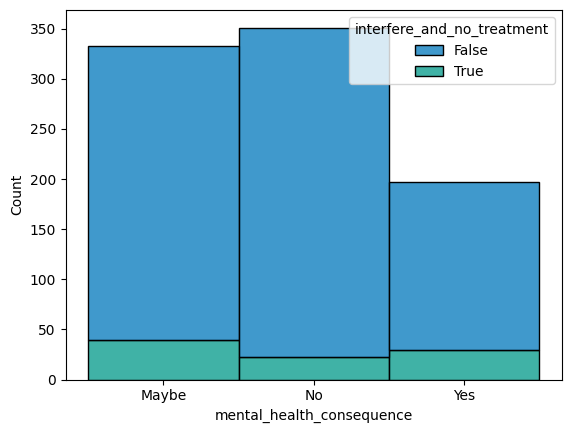

In [ ]:
ax = sns.histplot(binwidth=0.5, x= "mental_health_consequence", hue='interfere_and_no_treatment', data=df, stat="count", multiple="stack", palette=color_cat.values())
#Those who have issues but aren't seeking treatment are those who believe disucssing a mental health issue with their employer would have negative consequences 

In [ ]:
total_counts = df.groupby('mental_health_consequence')['interfere_and_no_treatment'].count()
percentages = df[df['interfere_and_no_treatment']].groupby('mental_health_consequence')['interfere_and_no_treatment'].count() / total_counts * 100
percentages
#The percentage of people who have negative mental health but haven't gotten treatment that think there would be negative consequences for mental health treatment is up 23% (maybe & yes) vs 6%

In [ ]:
total_counts = df.groupby('mental_health_consequence')['interfere_and_no_treatment'].count()
percentages = total_counts / total_counts.sum() * 100
percentages

In [ ]:
ax = sns.histplot(binwidth=0.5, x= "supervisor", hue='interfere_and_no_treatment', data=df, stat="count", multiple="stack", palette=color_cat.values())
#Also those who haven't sought treatment are those who wouldn't want to talk to their supervisor 

In [ ]:
total_counts = df.groupby('supervisor')['interfere_and_no_treatment'].count()
percentages = df[df['interfere_and_no_treatment']].groupby('supervisor')['interfere_and_no_treatment'].count() / total_counts * 100
percentages

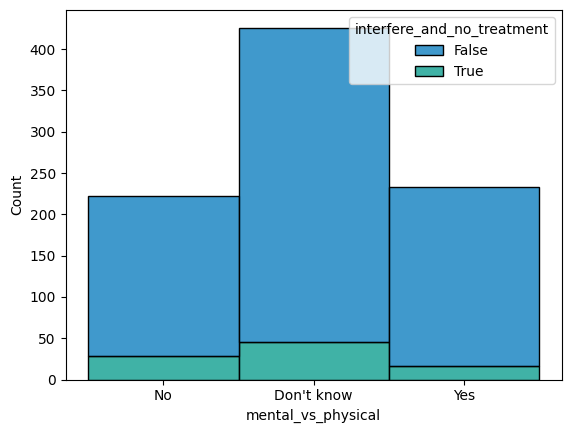

In [ ]:
ax = sns.histplot(binwidth=0.5, x= "mental_vs_physical", hue='interfere_and_no_treatment', data=df, stat="count", multiple="stack", palette=color_cat.values())
#Those who believe their employer wouldn't take mental health as seriously as physical health are those who aren't seeking treatment for their issues 

In [ ]:
total_counts = df.groupby('mental_vs_physical')['interfere_and_no_treatment'].count()
percentages = df[df['interfere_and_no_treatment']].groupby('mental_vs_physical')['interfere_and_no_treatment'].count() / total_counts * 100
percentages

In [ ]:
ax = sns.histplot(binwidth=0.5, x= "obs_consequence", hue='interfere_and_no_treatment', data=df, stat="count", multiple="stack", palette=color_cat.values())

In [ ]:
total_counts = df.groupby('obs_consequence')['interfere_and_no_treatment'].count()
percentages = df[df['interfere_and_no_treatment']].groupby('obs_consequence')['interfere_and_no_treatment'].count() / total_counts * 100
percentages

In [ ]:
total_counts = df.groupby('leave')['interfere_and_no_treatment'].count()
percentages = df[df['interfere_and_no_treatment']].groupby('leave')['interfere_and_no_treatment'].count() / total_counts * 100
percentages
#most people who have mental health issues and havent gotten treatement are those who find it difficult to leave 

In [ ]:
df['interfere_and_treatment'] = (df['work_interfere'].isin(['Sometimes', 'Often'])) & (df['treatment'] == 'Yes')
df['interfere_and_treatment'].value_counts()

In [ ]:
total_counts = df.groupby('anonymity')['interfere_and_treatment'].count()
percentages = df[df['interfere_and_treatment']].groupby('anonymity')['interfere_and_treatment'].count() / total_counts * 100
percentages

In [ ]:
#For those who experience mental health issues in the workplace, let's see how old each of these people are
df['mental_health_interference'] = (df['work_interfere'].isin(['Sometimes', 'Often']))


In [ ]:
import plotly.express as px

work_interference_counts = df['interfere_and_no_treatment'].value_counts()
print(work_interference_counts )

# Count the number of people in each age group
age_counts = df['Age'].value_counts()

# Calculate the percentage of people in each age group
age_percentages = (age_counts / age_counts.sum()) * 100

# Create the bar graph
fig = px.bar(x=age_counts.index, y=age_percentages)

# Set the labels and title
fig.update_layout(xaxis_title='Age', yaxis_title='Percentage', title='Age Distribution of People with Mental Health Problems that Interfere with their Work')

# Display the plot
fig.show()


False    790
True      91
Name: interfere_and_no_treatment, dtype: int64


In [ ]:
count_30_year_old = (df['Age'] == 30).value_counts()
print(count_30_year_old)
count_30_year_old_work_interference = ((df['Age'] == 30) & (df['work_interfere'].isin(['Sometimes', 'Often']))).sum()
count_30_year_old_work_interference

In [ ]:
import plotly.express as px

# Filter the DataFrame for people with "mental_health_interference" as True
mental_health_df = df[df['interfere_and_no_treatment']]

# Count the number of people in each age group
age_counts = df['Age'].value_counts().sort_index()

# Calculate the percentage of total people in each age group who have "mental_health_interference" as True
age_percentages = (mental_health_df['Age'].value_counts() / age_counts) * 100

# Create the bar graph
fig = px.bar(x=age_counts.index, y=age_percentages, hover_data={'Number of People this Age': age_counts})

# Set the labels and title
fig.update_layout(xaxis_title='Age', yaxis_title='Percentage', title='Percentage of People in Each Age Group with Mental Health Problems & No Treatment')

# Display the plot
fig.show()


In [ ]:
df['interfere_and_no_knowledge'] = (df['work_interfere'].isin(['Sometimes', 'Often'])) & ((df['care_options'] == 'No')|(df['care_options'] == "Not sure")) 

In [ ]:
import plotly.express as px

# Filter the DataFrame for people with "mental_health_interference" as True
mental_health_df = df[df['interfere_and_no_knowledge']]

# Count the number of people in each age group
age_counts = df['Age'].value_counts().sort_index()

# Calculate the percentage of total people in each age group who have "mental_health_interference" as True
age_percentages = (mental_health_df['Age'].value_counts() / age_counts) * 100

# Create the bar graph
fig = px.bar(x=age_counts.index, y=age_percentages, hover_data={'Number of People this Age': age_counts})

# Set the labels and title
fig.update_layout(xaxis_title='Age', yaxis_title='Percentage', title="Percentage of People in Each Age Group with Mental Health Problems & No Awareness of their Company's MH Resources")

# Display the plot
fig.show()

In [ ]:
## dataframe creation - for plotting
df_combinations = (
    df.groupby(["work_interfere", "care_options", "benefits", "treatment"])
    .size()
    .reset_index()
    .rename(columns={0: "count"})
)
## Creating sunburst chart
# define figure element
fig = px.sunburst(
    df,
    path=["work_interfere", "care_options", "benefits", "treatment"],
    title="Mental Health Issues - awareness of MH help, company benefits & treatment",
    color="work_interfere",
    height=800,
)
# display the figure
fig.show()

In [ ]:
import plotly.express as px

df_combinations = (
    df.groupby(["work_interfere", "care_options",  "treatment"])
    .size()
    .reset_index()
    .rename(columns={0: "count"})
)

fig = px.sunburst(
    df,  # Use df_combinations DataFrame instead of df
    path=["work_interfere", "treatment", "care_options"],
    title= "Mental Health Issues -> Treatment -> Awareness of Company's MH Options",
    color="work_interfere",
    hover_data={"work_interfere", "care_options", "treatment"},
    height=800,
)


fig.show()



In [ ]:
#New variable for those who experience mental health that interferes with their work but haven't gotten treatment 

df['interfere_and_no_treatment'] = (df['work_interfere'].isin(['Sometimes', 'Often'])) & (df['treatment'] == 'No') & ((df['benefits'] == "Yes") | (df['seek_help'] == "Yes"))
df['interfere_and_no_treatment'].value_counts()

In [ ]:
ax = sns.histplot(binwidth=0.5, x= "interfere_and_no_treatment", hue='anonymity', data=df, stat="count", multiple="stack")

In [ ]:
df['mental_health_consequence'].value_counts()

In [ ]:
df['phys_health_consequence'].value_counts()

In [ ]:
df['obs_consequence'].value_counts()

In [ ]:
df['leave'].value_counts()

In [ ]:
df['fear_no_wellness'] = (df['mental_health_consequence'].isin(['Yes', 'Maybe'])) & (df['wellness_program'] == 'No') 
df['fear_no_wellness'].value_counts()

In [ ]:
cross_tab = pd.crosstab(df['mental_health_consequence'], df['wellness_program'])
cross_tab

In [ ]:
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Mental Health Consequence?')
plt.ylabel('Employee Responses')

In [ ]:
cross_tab = pd.crosstab(df['wellness_program'], df['mental_vs_physical'])
cross_tab

In [ ]:
cross_tab = pd.crosstab(df['mental_health_consequence'], df['phys_health_consequence'])
cross_tab

In [ ]:
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Mental Health Consequence?')
plt.ylabel('Number of Employee Responses')
plt.legend(title='Physical Health Consequence?')

In [ ]:
df['any_help'] = (df['seek_help'].isin(['Yes'])) | (df['wellness_program'] == 'Yes') | (df['benefits'] == 'Yes') 
df['any_help'].value_counts()

In [ ]:
cross_tab = pd.crosstab(df['mental_health_consequence'], df['any_help])
cross_tab

In [ ]:
df['no_interfere'] = (df['work_interfere'].isin(['Never', 'Rarely'])) 
df['no_interfere'].value_counts()
df['no_interfere_no_awareness'] = (df['work_interfere'].isin(['Never', 'Rarely'])) & ((df['care_options'] == "No") | (df['care_options'] == "Not sure"))
print(df['no_interfere_no_awareness'].sum())
quotient = (df['no_interfere_no_awareness'].sum()/df['no_interfere'].sum())
quotient